# Lab One Exploring the data
## Team member
Rongwei Ji, Jonathan Mejia, Xiaoqing Zou
## Data introduction 
Data source: https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster
Data file name:  Lab1/data/ObesityDataSet.csv

17 colums total, 2111 rows, it contains the categorical targets

## Environment
python 3.11.5, conda 23.9.0 ,numpy-1.26.3 pandas-2.2.0 pytz-2023.4 tzdata-2023.4, pip-23.3.2

## Something more
Kaggal generate new dataset form the original one by the Deep learning about 20758 rows: https://www.kaggle.com/competitions/playground-series-s4e2/data and can using it do more. 
data/train.csv



## 1.Business Understanding
### Overview of the data
The data was gathered through an online platform via a survey where respondents remained anonymous. Its objective is to gauge obesity levels among individuals from Mexico, Peru, and Colombia, spanning ages 14 to 65. This dataset will be utilized to train a model using the 'train.csv' file and subsequently applied for predictions using the 'test.csv' file. Due to the nature of its collection method, there may be inaccuracies present; nevertheless, it serves as valuable material for training and prediction model development.
#### Purpose of the data
The dataset comprises 17 attributes that concentrate on various aspects related to obesity. These attributes represent commonly recognized factors associated with obesity. The dataset was gathered to analyze several actions concerning the outcomes of obesity. By utilizing this dataset, we can construct models to predict the likelihood of obesity based on individuals' daily habits. Ultimately, this predictive capability can assist people in avoiding unhealthy behaviors. Alternatively, it can aid in the development of mechanical interventions or the creation of novel treatment methods.
#### Prediction for data
By prediction the data, we can identify the key factors that directly influence obesity. Moreover, we can analyze behavioral data to assess the likelihood of obesity.
#### Who may benefit from this report?
Every people who care about their health and daily habits should be interested on this model and report. Since it reveal the relationship between the obesity and daily behavior.
#### How well would your prediction algorithm need to perform useful to these third parties?
The model aims to identify the factors influencing obesity and determine their impact. It will provide precise estimations of how specific variables contribute to obesity. To ensure accuracy, the model will be evaluated using test datasets, as the data source encompasses an entire survey.
#### Attribute:
**Eatting habits related attributes:**
Frequent consumption of high caloric food (FAVC), 
Frequency of consumption of vegetables (FCVC), 
Number of main meals (NCP), 
Consumption of food between meals (CAEC), 
Consumption of water daily (CH20), and Consumption of alcohol (CALC). <br>
**The attributes related with the physical condition are:** 
Calories consumption monitoring (SCC),
Physical activity frequency (FAF),
Time using technology devices (TUE), 
Transportation used (MTRANS) <br>
**NObesity Value:**
•Underweight Less than 18.5
•Normal 18.5 to 24.9
•Overweight 25.0 to 29.9
•Obesity I 30.0 to 34.9
•Obesity II 35.0 to 39.9
•Obesity III Higher than 40

## 2.Data Understanding
### Importing
Do something review of the data.

In [12]:
# read the data Referencing code from lecture and in-class example
import pandas as pd
import numpy as np

print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

df = pd.read_csv('data/ObesityDataSet.csv') # read in the csv file
print(df.info())
df.head()
       

Pandas: 2.0.3
Numpy: 1.24.3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2095 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF   

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Data type
Generaly, each type of the dataset should be numerical, each yes/no type will convert to binary encoding 1/0. In that case, it will suitable for the model alogrithm. In the analysis process, we can keep the non-numberic datatype for easily to read understand in data visualization.
In this dataset we check the non-numerical values to see the certain content and consider how to design the one-hot encoding. 
Let's review the valuse of the non-numerical columns

In [13]:
# we should comfirm the gender and other data type
non_numberic_list=['Gender','FAVC','family_history_with_overweight','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad']

_ = [print(i,df[i].unique()) for i in non_numberic_list] # review the non-numberic

df.describe() #check the range

Gender ['Female' 'Male']
FAVC ['no' 'yes']
family_history_with_overweight ['yes' 'no']
CAEC ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE ['no' 'yes']
SCC ['no' 'yes']
CALC ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2095.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.310366,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.369785,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,0.164768,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.926148,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.789402,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Encoding
The numberical types are all the float which is based on the certain caculated method from the survery.
All the numberical types can be the continuous.
In the non-numberical type attributes, some can be ordinal/ranked, such as: CAEC, NObeyesdad, some are nominal,such as MTRANS.
<br>
In this dataset ,they are all assumed to be the indicators hypothesized to be related to obesity. Currently, we assume that there are no redundant or irrelevant indicators.
Also the string type is readable, we can convert them into numberic for next model algorithm.
<br>
At this time, we can do convert part of the data, 
<br>`CAEC` no, somethimes, frequnetly, always: convert to 0,1,2,3
<br>`CALC` no, somethimes, frequnetly, always: convert to 0,1,2,3
<br>`NObeyesdad` 'Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III' : convert to 1,2,3,4,0,5,6
<br> yes/no ,convert to:0,1

In [14]:
df.replace(to_replace=['no','Sometimes','Frequently','Always','yes'],value=[0,1,2,3,1],inplace=True)
df.replace(to_replace=['Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III'],value=[1,2,3,4,None,5,6],inplace=True)
df.replace(to_replace=['Public_Transportation','Motorbike' ,'Automobile','Walking'  ,'Bike','Female' ,'Male'],value = [4,3,2,1,0,0,1],inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2095 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,4,1.0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,4,1.0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,4,1.0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,1,2.0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,4,3.0


In [15]:
df_describe=pd.DataFrame()
pd.set_option('max_colwidth',200)
df_describe['Attribute']=df.columns
df_describe['Description']=['Gender','Age','Height','Weight','family',
                            'Frequent consumption of high caloric food',
                            'Frequency of consumption of vegetables',
                            'Number of main meals',
                            'Consumption of food between meals',
                            'SMOKE',
                            'Consumption of water daily','Calories consumption monitoring',
                            "Physical activity frequency",
                          
                            "Time using technology devices",
                            "Consumption of alcohol",
                            "Transportation used","Obeyesdad"]
df_describe['Type']=['Bool,1/0','Interval,float','Ratio,float','Ratio,float','Bool,1/0','ratio,float','ratio,float','ratio,float','ratio,float',"Bool,1/0","Ordinal,int","Bool,1/0","ratio,float","ratio,float","Ordinal,int","norminal","Ordinal,int"]
df_describe['Convertion/Range']=['1=male,0=female',"14-65",'1.45-1.98','39-173','yes=1.no=0','1-3','1-3','1-3','0=no,1=sometimes,2=frequently,3=always','yes=1.no=0','1-3','yes=1.no=0','0-3','0-2','0=no,1=sometimes,2=frequently,3=always','','Normal_Weight=1,Overweight_Level_I=2 ,Overweight_Level_II=3,Obesity_Type_I=4, Insufficient_Weight=0,Obesity_Type_II=5,Obesity_Type_III=6']
df_describe
# **Eatting habits related attributes:**
# Frequent consumption of high caloric food (FAVC), 
# Frequency of consumption of vegetables (FCVC), 
# Number of main meals (NCP), 
# Consumption of food between meals (CAEC), 
# Consumption of water daily (CH20), and Consumption of alcohol (CALC). <br>
# **The attributes related with the physical condition are:** 
# Calories consumption monitoring (SCC),
# Physical activity frequency (FAF),
# Time using technology devices (TUE), 
# Transportation used (MTRANS) <br>

,Attribute,Description,Type,Convertion/Range
0,Gender,Gender,"Bool,1/0","1=male,0=female"
1,Age,Age,"Interval,float",14-65
2,Height,Height,"Ratio,float",1.45-1.98
3,Weight,Weight,"Ratio,float",39-173
4,family_history_with_overweight,family,"Bool,1/0",yes=1.no=0
5,FAVC,Frequent consumption of high caloric food,"ratio,float",1-3
6,FCVC,Frequency of consumption of vegetables,"ratio,float",1-3
7,NCP,Number of main meals,"ratio,float",1-3
8,CAEC,Consumption of food between meals,"ratio,float","0=no,1=sometimes,2=frequently,3=always"
9,SMOKE,SMOKE,"Bool,1/0",yes=1.no=0


### Finding duplicate
There are multiple instances of duplication within the dataset. Due to the absence of a unique identification attribute, it's possible for two individuals to have identical values in this survey based on the limited data attributes. Consequently, it's not straightforward to remove these duplicate entries.

In [16]:
# finding the duplicate
dup=df.duplicated()
print("There are {} duplicate instance".format(len(df[dup])))

There are 22 duplicate instance


### Finding missing

matplotlib: 3.7.2


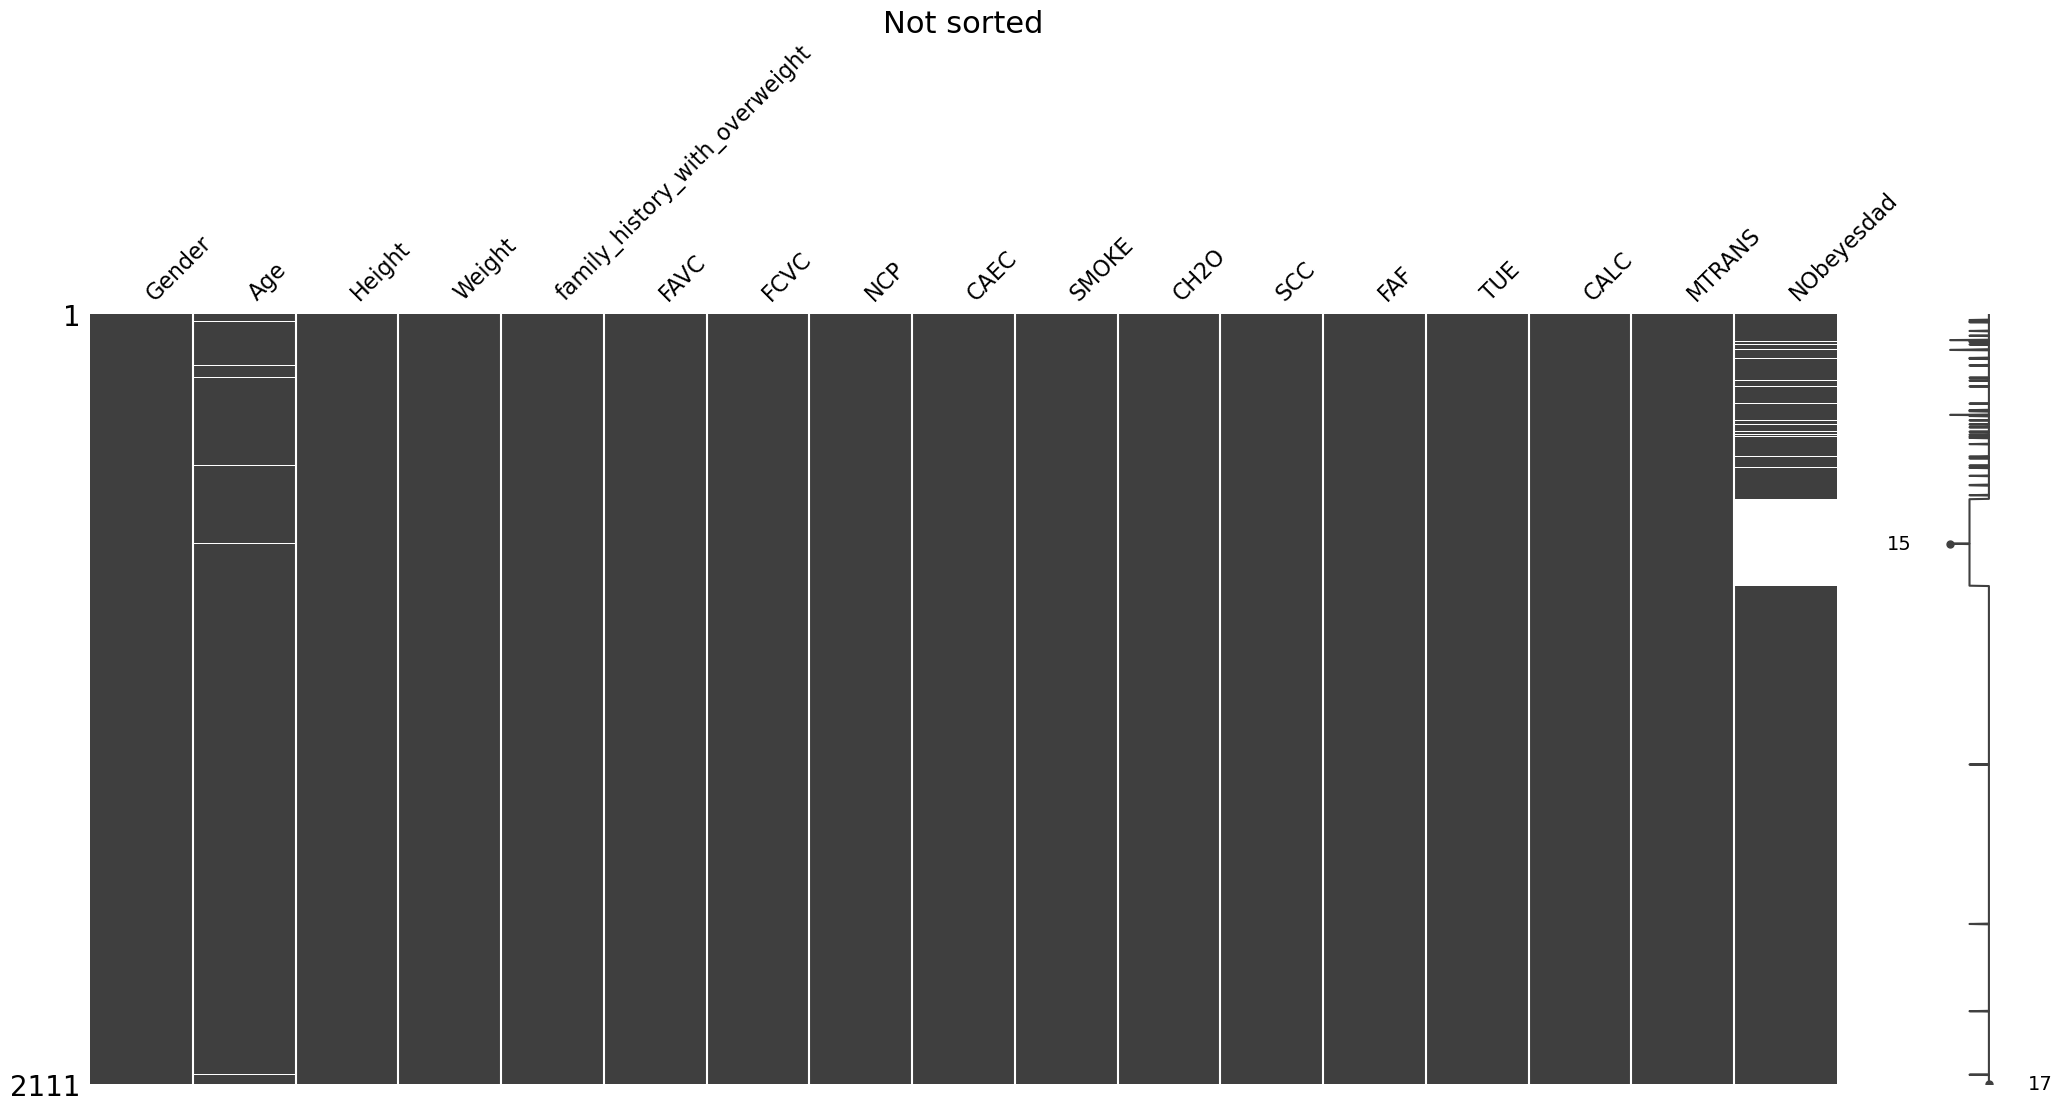

<Figure size 640x480 with 0 Axes>

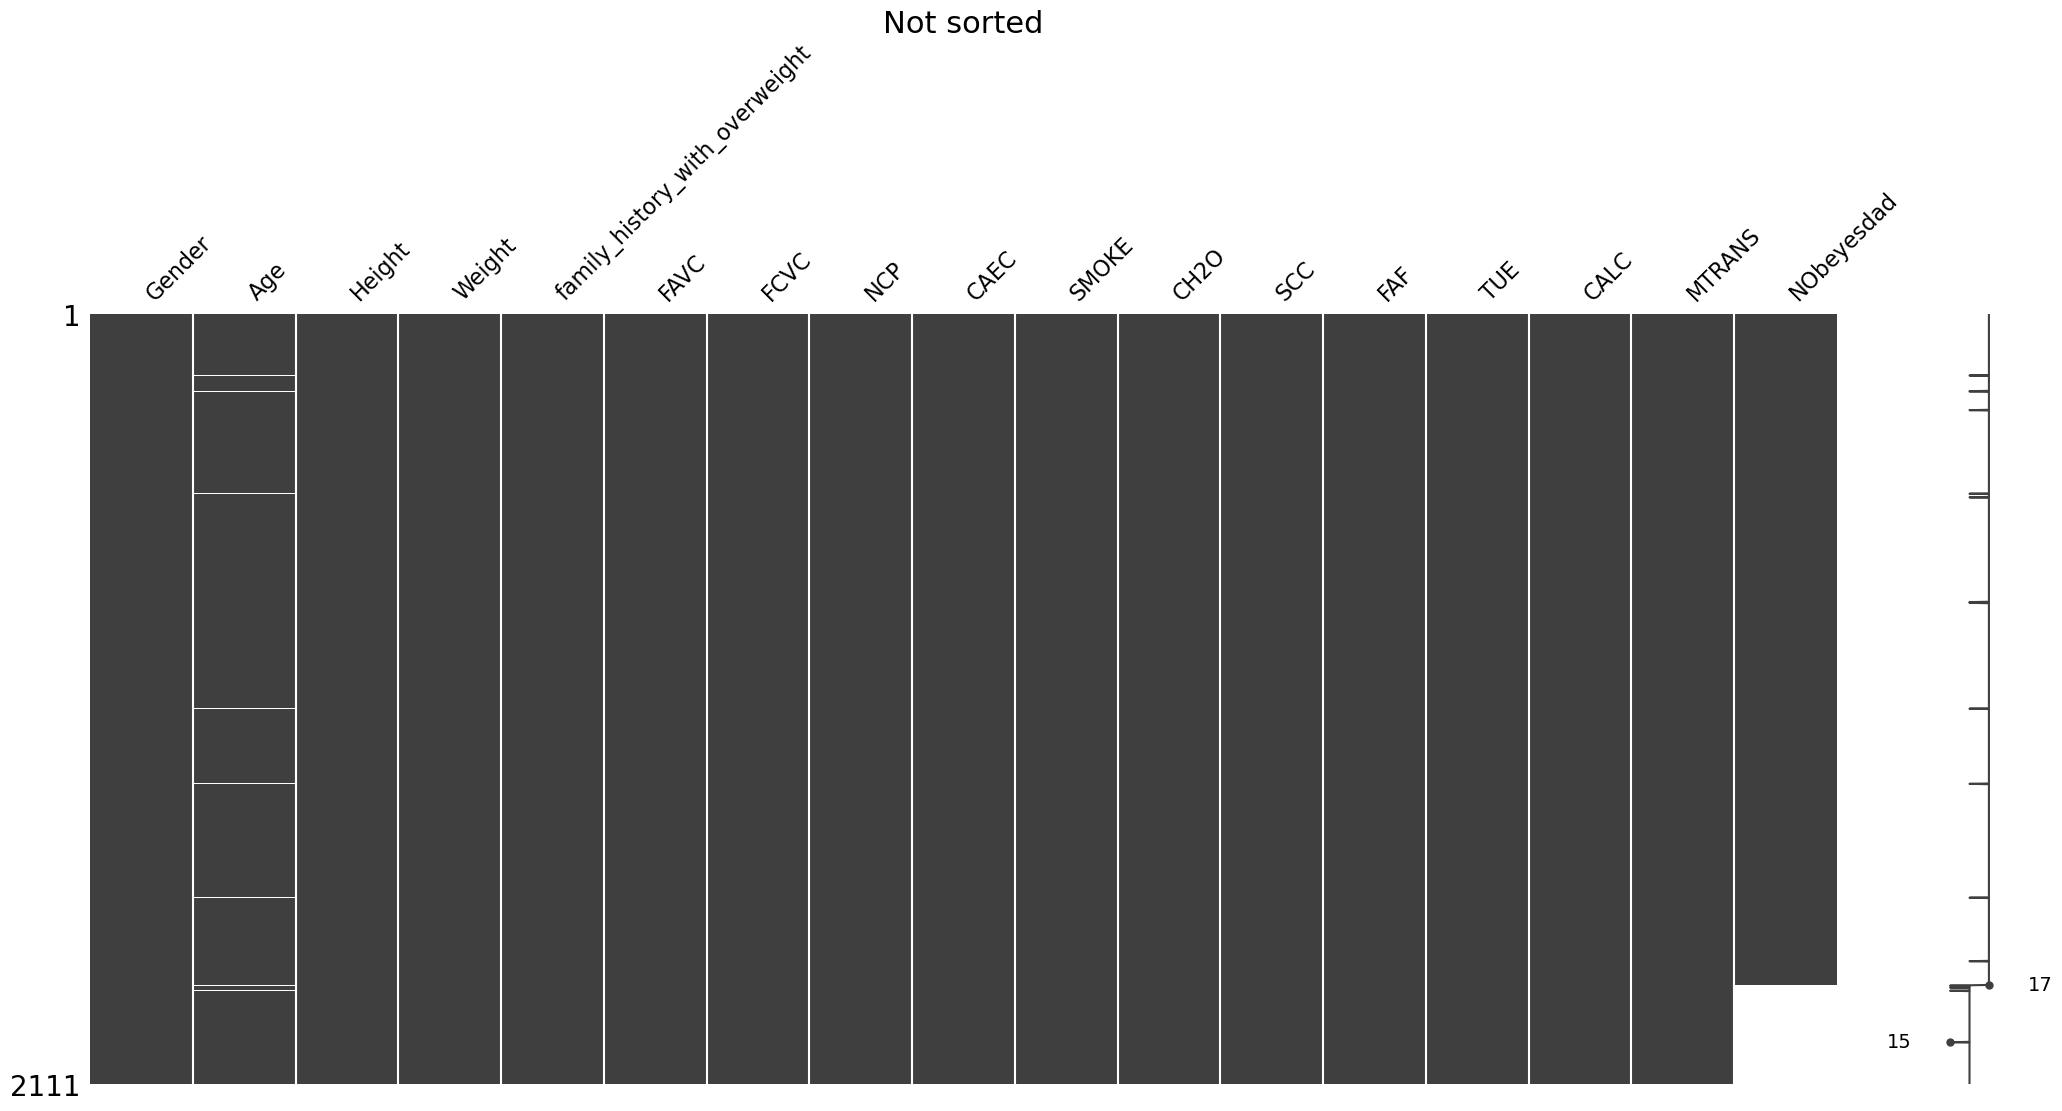

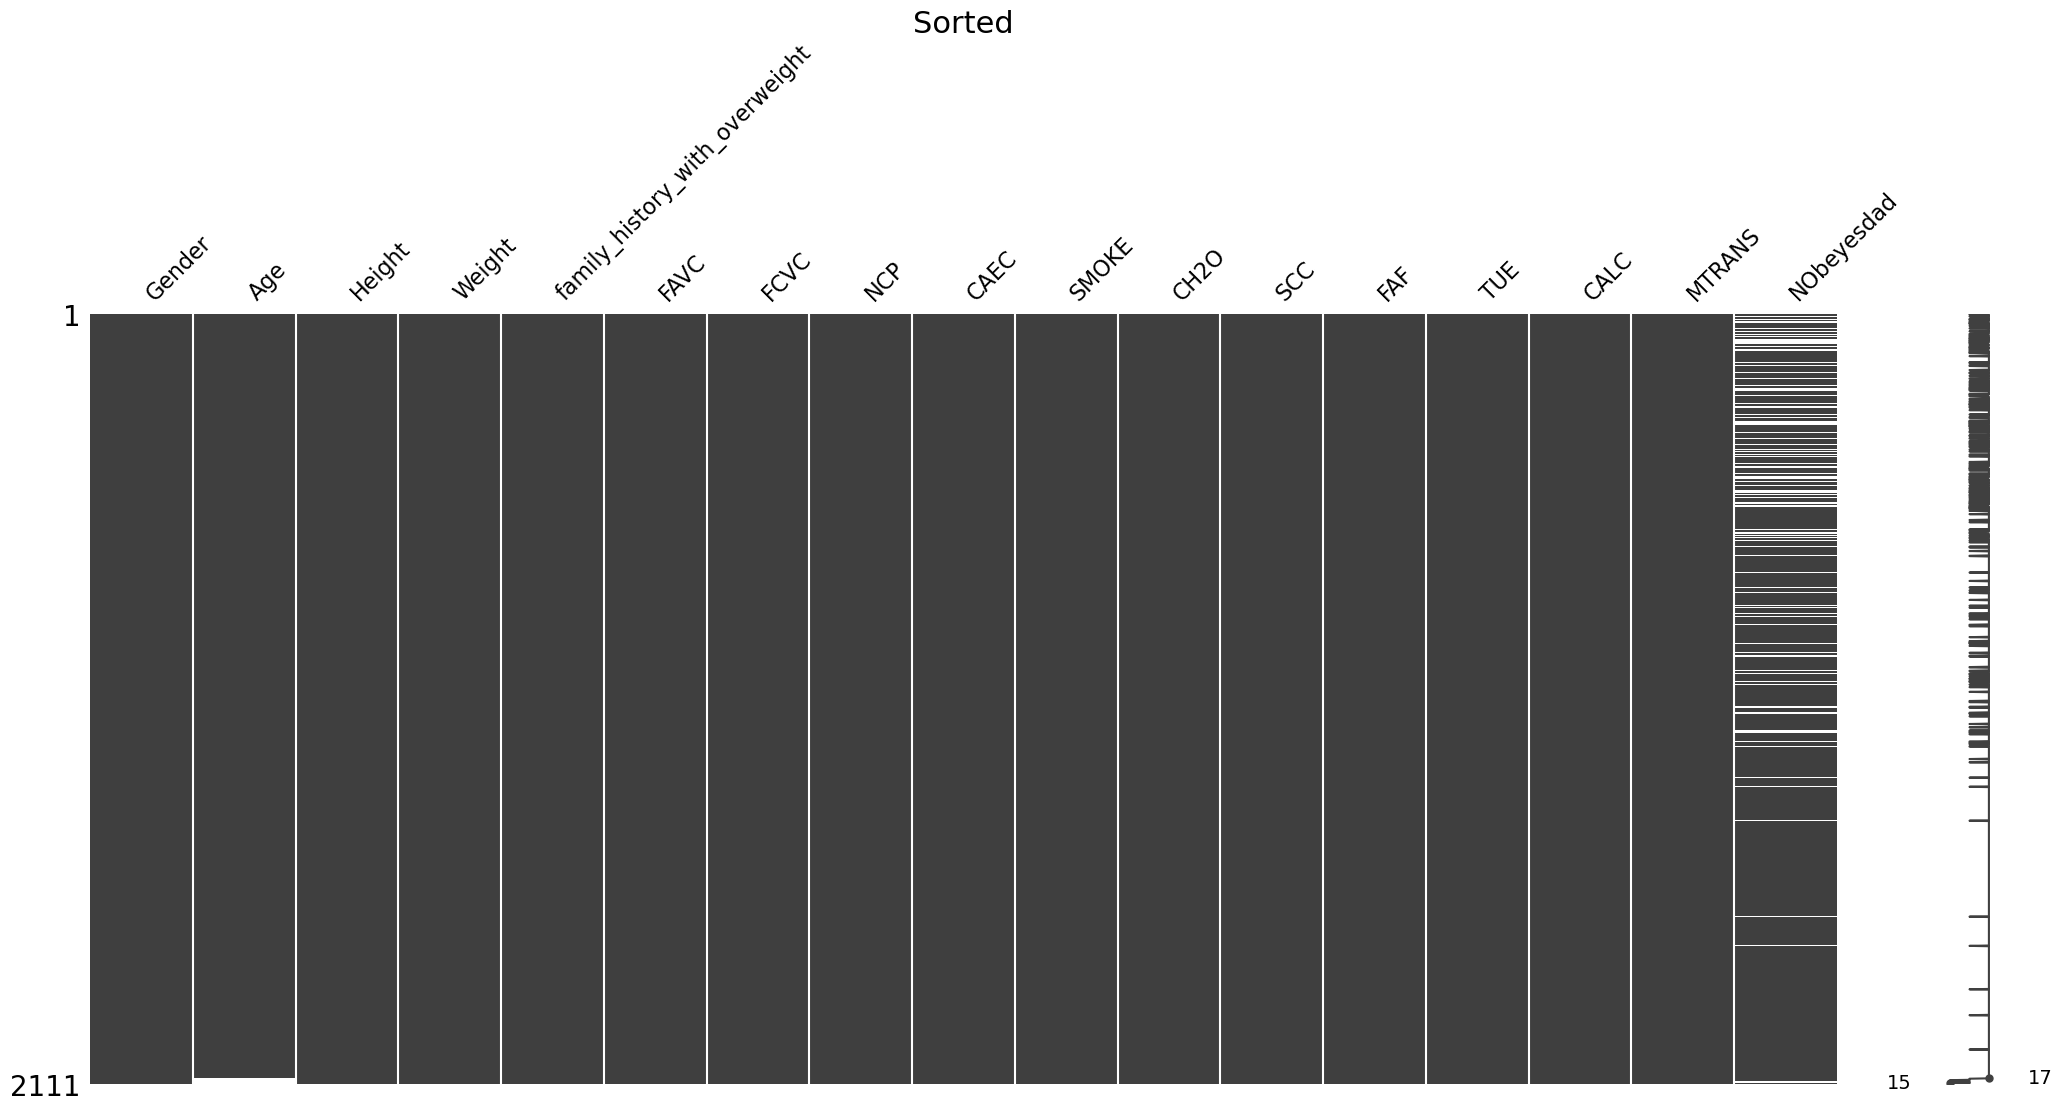

In [17]:
# Referencing code from lecture and in-class example
import matplotlib
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter('ignore',DeprecationWarning)
%matplotlib inline
import missingno as mn 

print('matplotlib: {}'.format(matplotlib.__version__))
mn.matrix(df)
plt.title("Not sorted", fontsize=22)
plt.figure()
mn.matrix(df.sort_values(by=["NObeyesdad"]))
plt.title("Not sorted", fontsize=22)
mn.matrix(df.sort_values(by=["Age"]))
plt.title("Sorted",fontsize=22)
plt.show()


In [18]:
df.Weight.describe()

count    2111.000000
mean       86.586058
std        26.191172
min        39.000000
25%        65.473343
50%        83.000000
75%       107.430682
max       173.000000
Name: Weight, dtype: float64

The chart displayed indicates several missing age values, potentially due to customers omitting this information. Age is a crucial factor in understanding obesity. These omissions likely stem from errors in the survey process, suggesting a lack of strict guidelines. Additionally, throughout going through the data, the details of values related to NObeyesdad were valued as insufficient weight which indicated a gap in the data provided. This indicated NObeyesdad values missing, potentially to no relation from all attributes which can be fixed by machine learning techniques, to help identify some of the data presented.

### Imputation
To address this issue, we can utilize height as a proxy to categorize the data, as it may correlate closely with age.


In [19]:


# Referencing code from lecture and in-class example
# do something group 
df_grouped = df.groupby(by=['Age','FAVC'])
df_imputed = df_grouped.transform(lambda grp: grp.fillna(grp.median))
print('------------')

# the above process can remove columns, so let's find that and fix it

names_removed = list(set(df.columns) - set(df_imputed.columns)) # use list like a set operator
print(names_removed)
print('------------')

df_imputed[names_removed] = df[names_removed]
df_imputed.dropna(inplace=True)
# Ensure 'Age' is numeric
#df_imputed[''] = pd.to_numeric(df['Age'], errors='coerce')  # Convert non-numeric values to NaN

print(df.info())
print(df_imputed.info())




------------
['FAVC', 'Age']
------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2095 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64

******Using KNN and comparing the results of how many data points are missing.

In [20]:
# Referencing code from lecture and in-class example
# compared the distribution between the original and imputed

df_imputed['NObeyesdad'] = df['NObeyesdad'].astype(float)

from sklearn.impute import KNNImputer
import copy

# get object for imputation
knn_obj = KNNImputer(n_neighbors=3)

features_to_use = ['family_history_with_overweight']

# create a numpy matrix from pandas numeric values to impute
temp = df[features_to_use].to_numpy()

# use sklearn imputation object
knn_obj.fit(temp) # fit the object
temp_imputed = knn_obj.transform(temp) # transform all mssing data
#    could have also done:
# temp_imputed = knn_obj.fit_transform(temp)

# this is VERY IMPORTANT, make a deep copy, not just a reference to the object
# otherwise both data frames will be manipulated
df_imputed = copy.deepcopy(df) # not just an alias
df_imputed[features_to_use] = temp_imputed
df_imputed.dropna(inplace=True)
df_imputed.info()



<class 'pandas.core.frame.DataFrame'>
Index: 1827 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1827 non-null   int64  
 1   Age                             1827 non-null   float64
 2   Height                          1827 non-null   float64
 3   Weight                          1827 non-null   float64
 4   family_history_with_overweight  1827 non-null   float64
 5   FAVC                            1827 non-null   int64  
 6   FCVC                            1827 non-null   float64
 7   NCP                             1827 non-null   float64
 8   CAEC                            1827 non-null   int64  
 9   SMOKE                           1827 non-null   int64  
 10  CH2O                            1827 non-null   float64
 11  SCC                             1827 non-null   int64  
 12  FAF                             1827 no

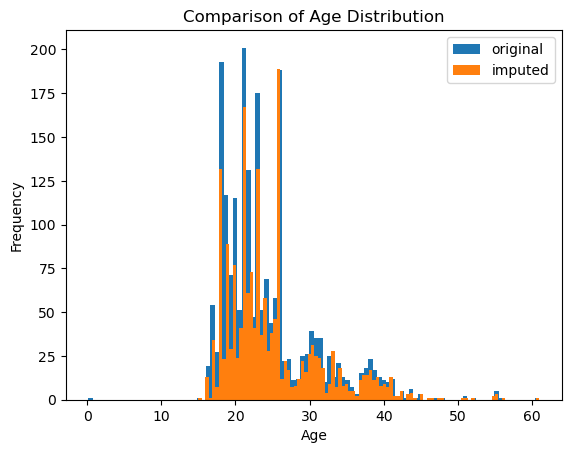

In [21]:
df.Age.plot(kind='hist', label="original",bins=100)
df_imputed.Age.plot(kind='hist', label="imputed",bins=100)

plt.legend()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Comparison of Age Distribution')
plt.show()


### Finding outlier
As description, the age should be from 14 to 65, there are something other values in this dataset not qualified. We can delete the unresaonble value to make it empty ,then we could do the imputation.

In [22]:
# we can find out the age has several outerlier,using the df after imputed
# fix this by ensuring that the Age column is converted to a numeric type after imputation.
df_imputed['Age'] = pd.to_numeric(df_imputed['Age'], errors='coerce')
df_imputed.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,0.525999,24.985850,1.703011,92.029547,0.870279,0.894362,2.409961,2.652037,1.094143,0.022989,2.026804,0.040504,0.972421,0.631763,0.754789,3.453749,3.576902
std,0.499460,6.458426,0.092180,23.503998,0.336088,0.307457,0.524797,0.752571,0.437687,0.149908,0.611312,0.197191,0.843489,0.598145,0.512786,0.946788,1.694645
min,0.000000,15.000000,1.450000,42.300000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,20.875914,1.630000,75.000000,1.000000,1.000000,2.000000,2.635933,1.000000,0.000000,1.624647,0.000000,0.095141,0.000000,0.000000,2.000000,2.000000
50%,1.000000,23.000000,1.700038,87.668828,1.000000,1.000000,2.294067,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.583450,1.000000,4.000000,4.000000
75%,1.000000,26.835887,1.770000,110.926339,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.507046,0.000000,1.545405,1.000000,1.000000,4.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


In [23]:
# we can delete it or delete row. because there is only one row has these outlier, we believe deleting it won't influnt the result
df=df_imputed[df_imputed["Age"]>=14]
df.describe()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,0.525999,24.985850,1.703011,92.029547,0.870279,0.894362,2.409961,2.652037,1.094143,0.022989,2.026804,0.040504,0.972421,0.631763,0.754789,3.453749,3.576902
std,0.499460,6.458426,0.092180,23.503998,0.336088,0.307457,0.524797,0.752571,0.437687,0.149908,0.611312,0.197191,0.843489,0.598145,0.512786,0.946788,1.694645
min,0.000000,15.000000,1.450000,42.300000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,20.875914,1.630000,75.000000,1.000000,1.000000,2.000000,2.635933,1.000000,0.000000,1.624647,0.000000,0.095141,0.000000,0.000000,2.000000,2.000000
50%,1.000000,23.000000,1.700038,87.668828,1.000000,1.000000,2.294067,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.583450,1.000000,4.000000,4.000000
75%,1.000000,26.835887,1.770000,110.926339,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.507046,0.000000,1.545405,1.000000,1.000000,4.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


### Summary about the Data
Now that we've reviewed the data, identified the types of values, and understood the structure of attributes, we've also handled missing data and considered duplicate entries. Next, we can proceed with visualizing the data to draw conclusions and gain insights.

## 3.Data Visualization
Before we start the visualization, we want to use the visualization and the graphic, ,histogram, diagram, plot to find out our main question. We can go by distribution-correlation to find the key factors.
### Distribution



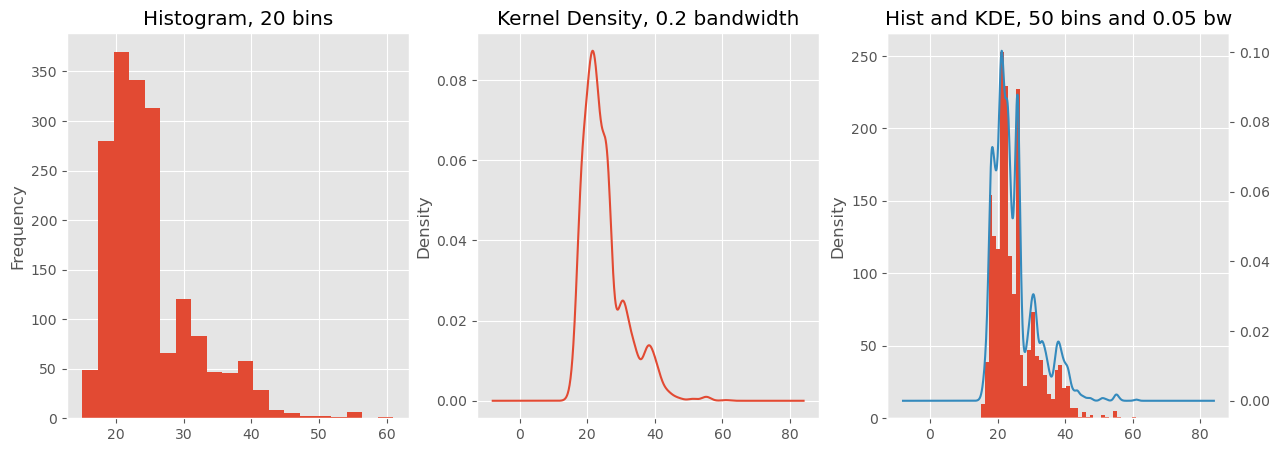

In [24]:
# reference code from the lecture
# Age distribution
plt.style.use('ggplot')

fig=plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
# we have the df is imputed dataframe
df.Age.plot.hist(bins=20)
plt.title('Histogram, 20 bins')

plt.subplot(1,3,2)
df.Age.plot.kde(bw_method=0.2)
plt.title('Kernel Density, 0.2 bandwidth')

plt.subplot(1,3,3)
df.Age.plot.hist(bins=40)
df.Age.plot.kde(bw_method=0.1, secondary_y=True)
plt.title('Hist and KDE, 50 bins and 0.05 bw')
plt.show()


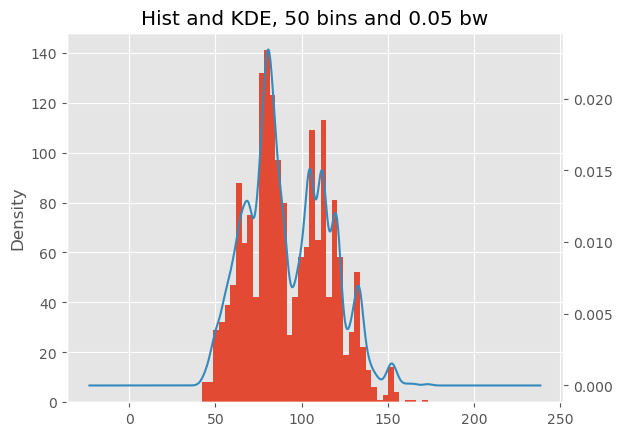

In [25]:
# weight distribution
df.Weight.plot.hist(bins=40)
df.Weight.plot.kde(bw_method=0.1, secondary_y=True)
plt.title('Hist and KDE, 50 bins and 0.05 bw')
plt.show()

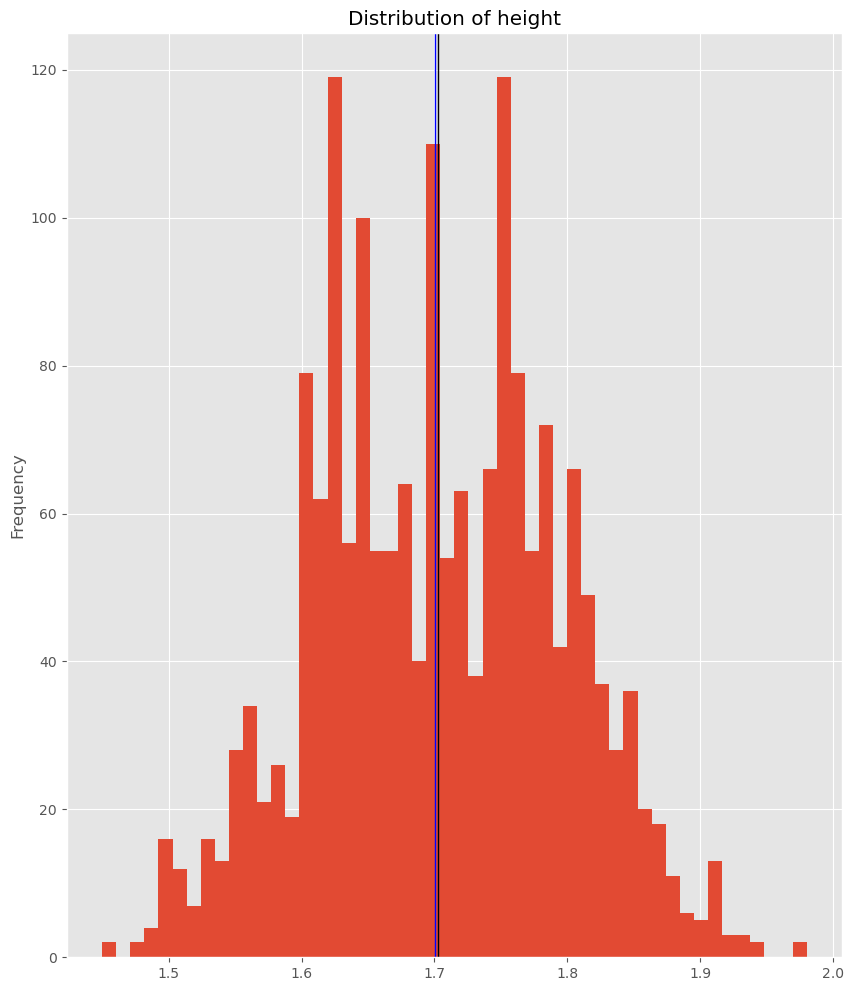

In [26]:
# heigh distribution, another type of distribution
plt.figure(figsize=(10,12))
df.Height.plot.hist(bins=50)
plt.axvline(df.Height.mean(), color='black', linewidth=1)
plt.axvline(df.Height.median(), color='blue', linewidth=1) 
plt.title('Distribution of height')
plt.show()

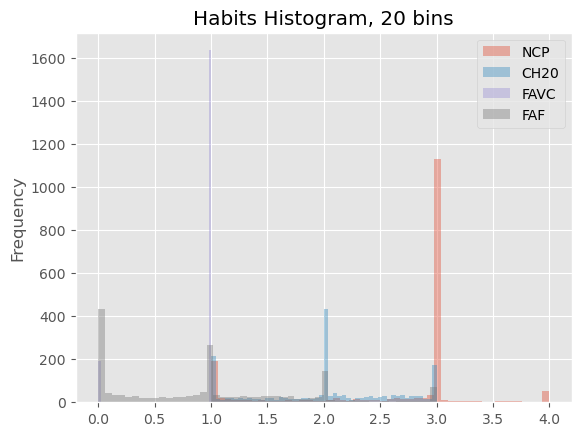

In [27]:
# several habit distribution example
# we have the df is imputed dataframe
df.NCP.plot(kind='hist',bins=50,alpha=0.4,label='NCP')
df.CH2O.plot(kind='hist',bins=50,alpha=0.4,label='CH20')
df.FAVC.plot(kind='hist',bins=50,alpha=0.4,label='FAVC')
df.FAF.plot(kind='hist',bins=50,alpha=0.4,label='FAF')
plt.title('Habits Histogram, 20 bins')
plt.legend()
plt.show()



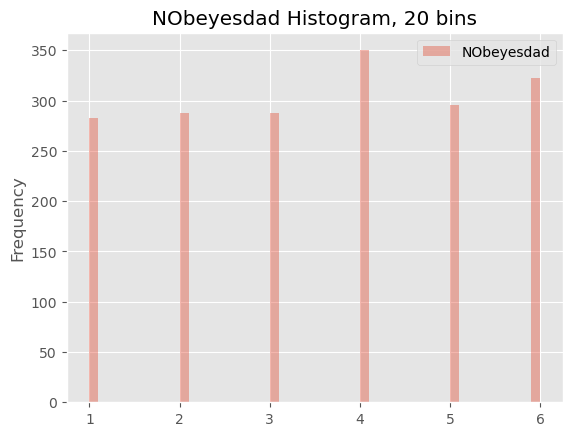

In [28]:
df.NObeyesdad.plot(kind='hist',bins=50,alpha=0.4,label='NObeyesdad')
plt.title('NObeyesdad Histogram, 20 bins')
plt.legend()
plt.show()

#### View

From this histogram, it's evident that the majority of survey participants fall within the younger age groups. This observation suggests that the survey might have been predominantly accessed by younger individuals, possibly due to its online nature. Younger demographics tend to have easier access to the internet and are more likely to prioritize personal health concerns.

This prompts us to inquire about the primary factors contributing to obesity. The pronounced peak in age distribution provides a clear indication. Based on this dataset, it seems prudent to focus interventions primarily on younger demographics, particularly those aged approximately between 14 to 40.

Additionally, the histogram reveals a concentrated weight distribution with a noticeable peak. This suggests that weight values tend to cluster within a certain range, indicating potential patterns or trends in weight distribution among the surveyed population.

Furthermore, when examining features related to habits, it's notable that certain integer values exhibit distinct peaks. Although these features are continuous in nature, the histogram displays spikes at specific integer intervals. This suggests that certain habits or behaviors may be more prevalent among survey respondents, leading to higher frequencies at these discrete values.

From the NObeyesdad Value, the distribution is average cover all the 6 values, we can know  attributions and obesity relation ship by the next correlation analysis.

### Correlation
#### Gender vs Obesity


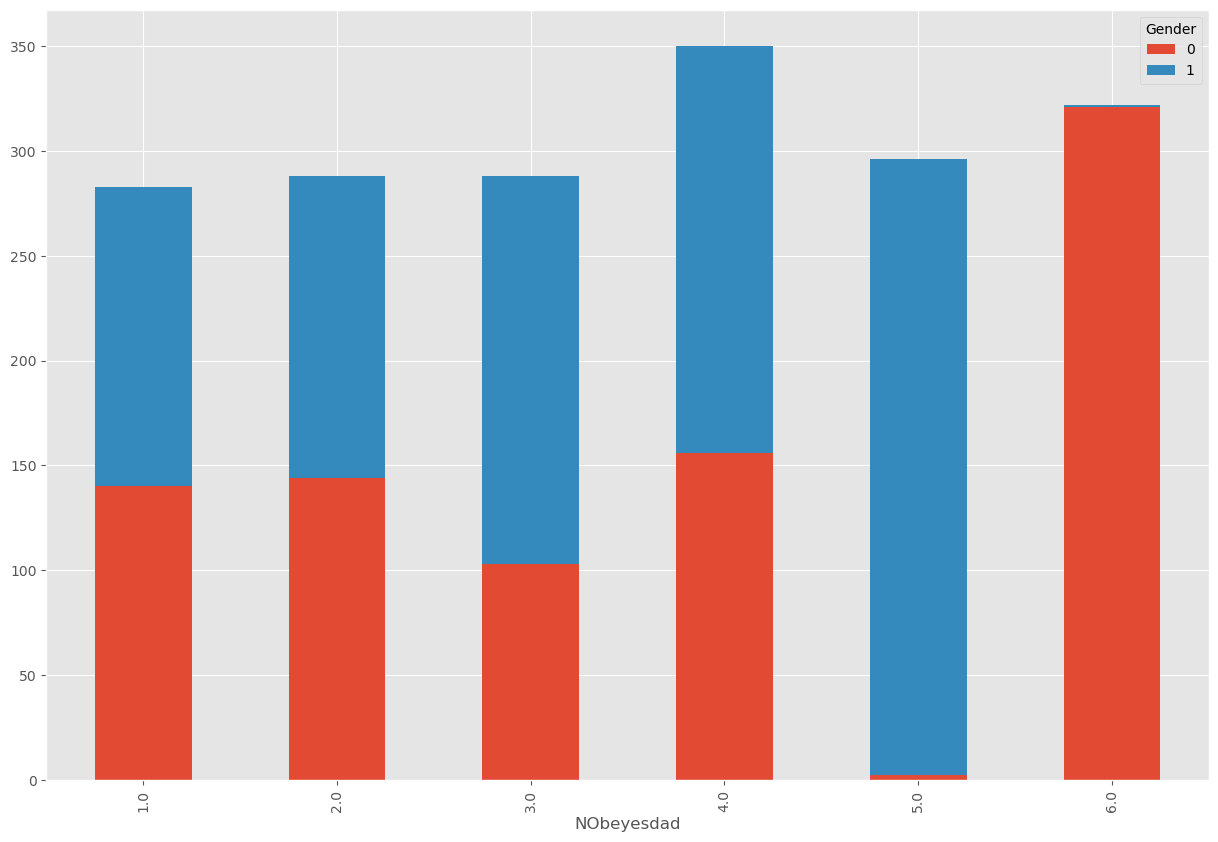

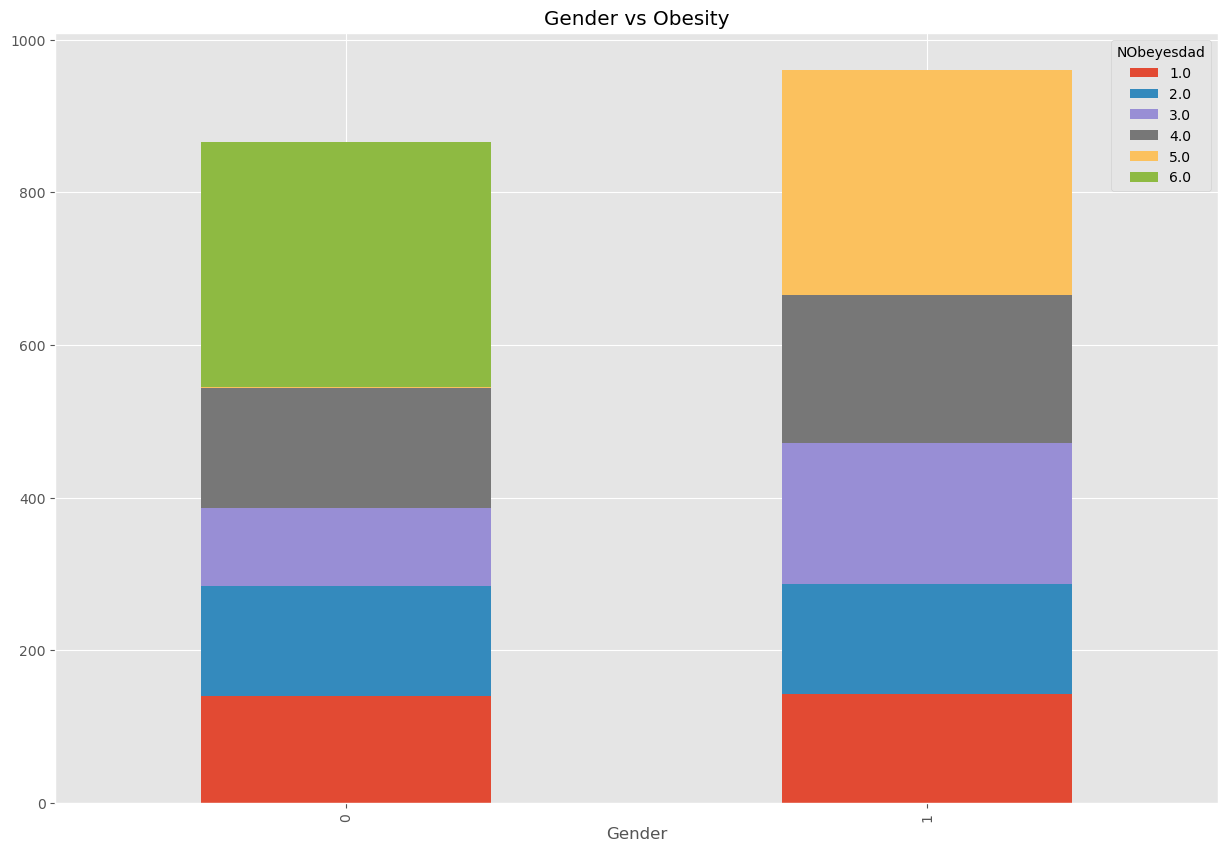

In [29]:
gender=pd.crosstab(df['NObeyesdad'],df['Gender'])
gender2=pd.crosstab(df['Gender'],df['NObeyesdad'])
gender.plot(kind='bar',figsize=(15,10),stacked=True)
gender2.plot(kind='bar',figsize=(15,10),stacked=True)
plt.title('Gender vs Obesity')
plt.show()

Gender:
In the graph, the total number of genders is roughly equal, but there are outlier values for gender in the NObeyesdad categories 5 and 6. The dataset lacks sufficient representation of individuals with NObeyesdad levels 5-6.

Within this dataset, females generally exhibit better obesity outcomes in the value range from 0 to 4.

#### Age vs Obesity

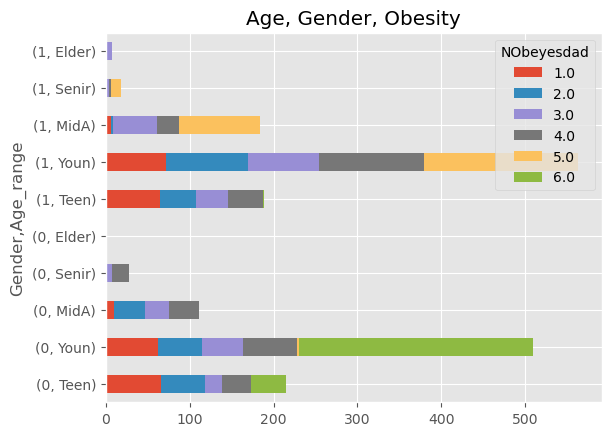

In [30]:
# make the group 
# reference from the lecture in class
df['Age_range']=pd.cut(df["Age"],[14,20,30,40,50,60],labels=['Teen','Youn','MidA','Senir','Elder'])
gender_age=pd.crosstab([df["Gender"],df["Age_range"]],df['NObeyesdad'])
gender_age.plot(kind='barh', stacked=True)
plt.title("Age, Gender, Obesity")
plt.show()

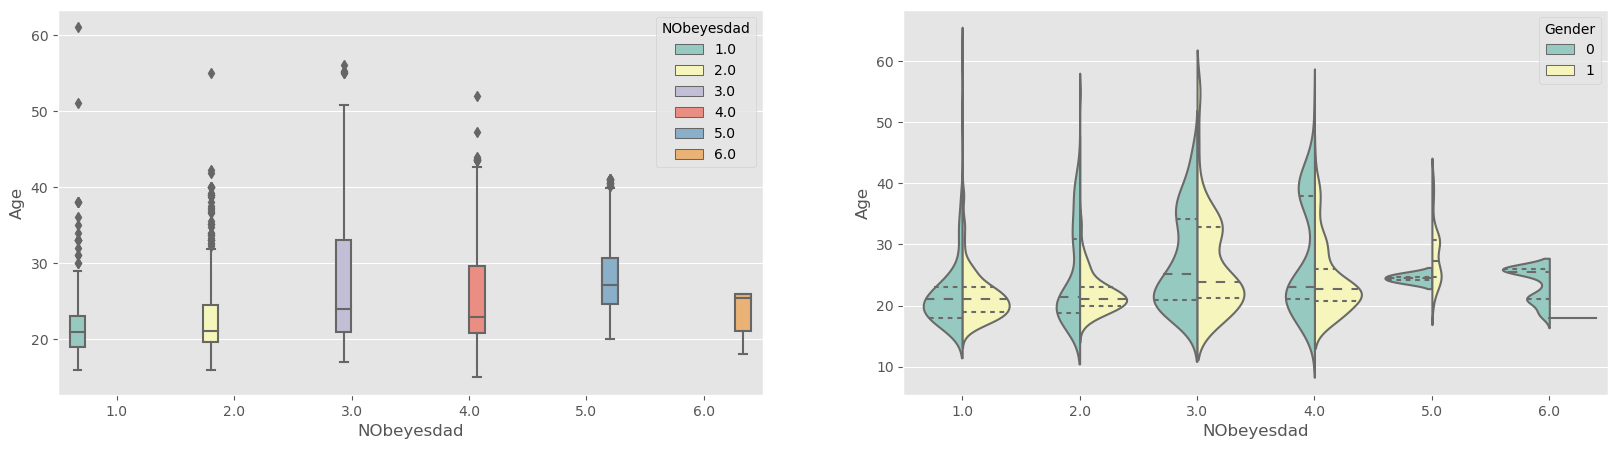

In [31]:
# Age box plot
import seaborn as sbn
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sbn.boxplot(x='NObeyesdad',y='Age',data=df,palette='Set3',hue='NObeyesdad')

#violinplot of mean age
plt.subplot(1,2,2)
sbn.violinplot(x='NObeyesdad',y='Age',data=df,palette='Set3',hue='Gender',split=True,inner="quart")
plt.show()


In the violin plot, we integrate gender and age, revealing that older individuals tend to have a higher percentage of obesity risk. Additionally, datasets with a wide age range often exhibit gender imbalances, which can result in inaccuracies when predicting obesity rates among elderly individuals.
#### Correlation Matrix


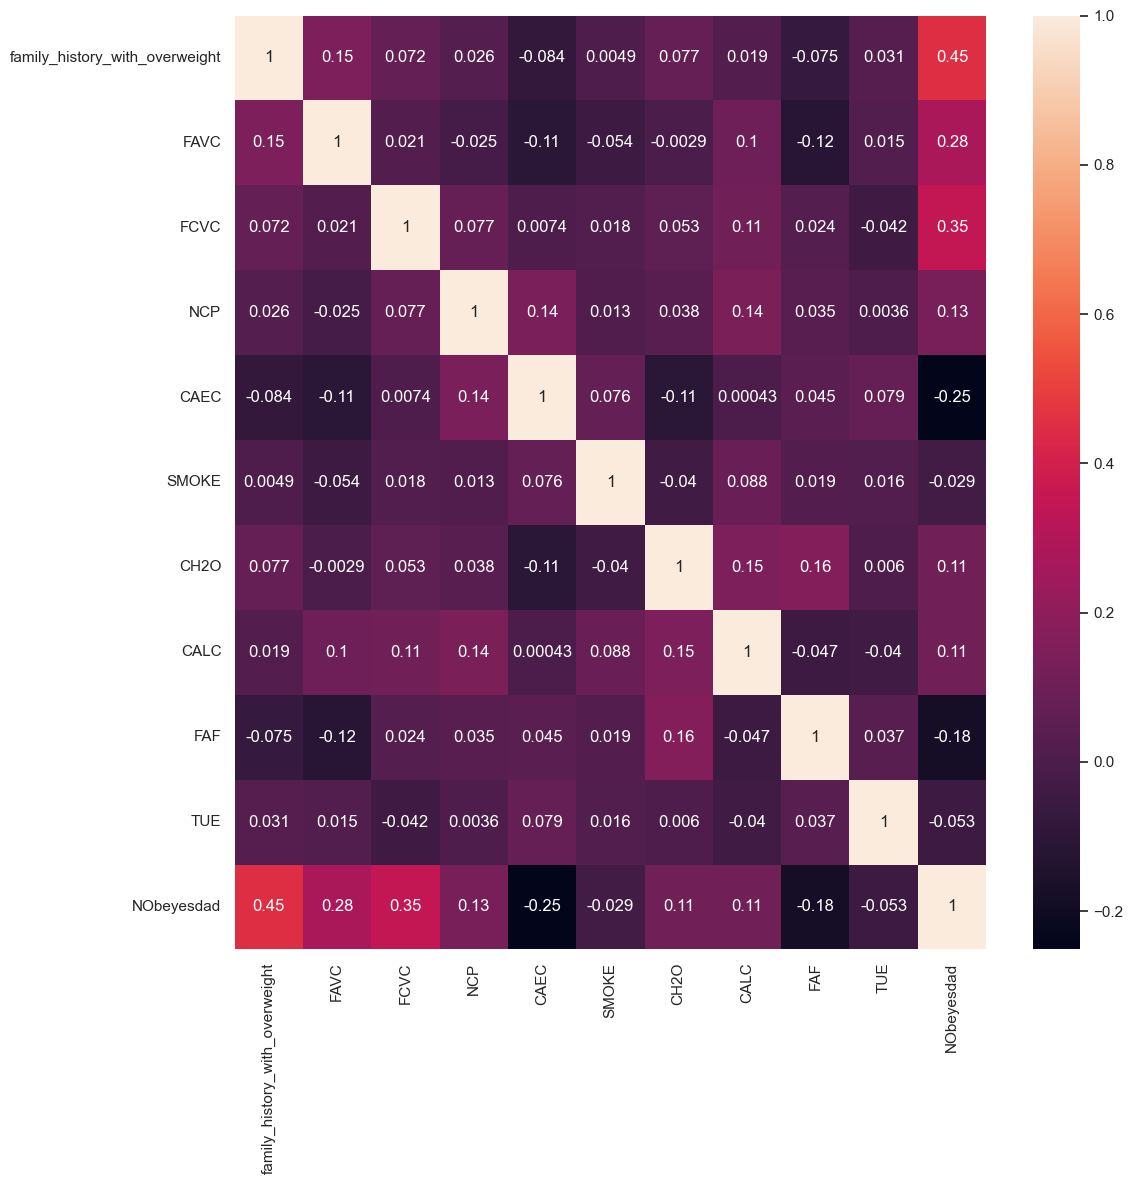

In [32]:
# habits and family factors
colunms_selected=['family_history_with_overweight','FAVC','FCVC','NCP','CAEC',"SMOKE",'CH2O',"CALC",'FAF','TUE','NObeyesdad']
matrix_df=df[colunms_selected]
cmap=sbn.set(style='darkgrid') #reference from the class code
f,ax=plt.subplots(figsize=(12,12))
sbn.heatmap(matrix_df.corr(),cmap=cmap,annot=True)
f.tight_layout()

Based on the correlation matrix, it's evident that most of the habits attributes positively correlate with obesity. Among these attributes, FAVC (Frequent consumption of high-caloric food) emerges as the primary factor. Conversely, CAEC (Consumption of food between meals) exhibits a negative correlation with obesity. This could be due to various reasons; for instance, individuals may consume healthy foods between meals, which might not significantly impact obesity.

It's important to note that family-related factors, although not considered as habits elements, can heavily influence obesity outcomes. The some attribute in this dataset lack sufficient volume to relfect specific feature, such as the method of transport. We can ignore the relation about that.


Question 1: Are there significant differences in obesity rates based on gender and age groups?
<br>Answer: Yes, analysis of the dataset reveals notable disparities in obesity rates across different age and gender categories. Generally, younger individuals exhibit lower likelihoods of obesity, while females tend to have lower obesity prevalence compared to males.

Question 2: Can we identify distinct segments of individuals based on their behaviors related to obesity?<br>
Answer: Indeed, the dataset provides various attributes related to behaviors, allowing for quantitative analysis. Utilizing correlation matrices, we observe diverse associations with obesity. For instance, attributes like FAVC and FCVC exhibit positive correlations with obesity, while CAEC shows a negative correlation. Moreover, certain behavioral factors, such as smoking habits, may not strongly influence obesity outcomes.

Question 3: Can we identify effective interventions or behavior changes that are associated with reduced obesity rates?<br>
Answer: Certainly. Effective strategies to reduce obesity rates may involve increasing physical activity levels and adopting healthier eating habits, particularly by reducing the consumption of high-calorie foods. These lifestyle changes can contribute significantly to preventing and managing obesity.


## 4.Exception work and Dimensionality Reduction

The overall coherence of this report and its conclusions is evident. We conducted thorough visualizations to address the questions posed, ensuring a comprehensive exploration of the dataset. In addition, we diligently cited our sources and provided annotations to support our findings.

We made several assumptions to delve into the main elements and attributes within the dataset, which allowed us to generate subsequent questions for further exploration and analysis. This approach facilitated a robust understanding of the data and enabled us to draw meaningful conclusions.

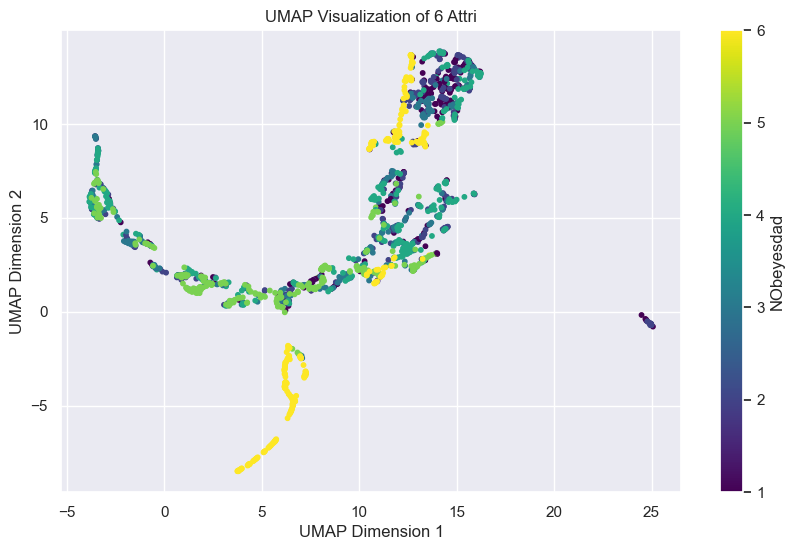

In [33]:
# using the UMAP
# reference from https://github.com/lmcinnes/umap
# reference from https://umap-learn.readthedocs.io/en/latest/plotting.html
# reference from https://pair-code.github.io/understanding-umap/
import umap
# choose several colunms 
select_colunms=['family_history_with_overweight','Age','FAVC','FCVC','FAF','TUE']

x = df[select_colunms]  # Features
y = df["NObeyesdad"]  # Target labels
# embedding = umap.UMAP().fit(x.values)
embedding = umap.UMAP().fit_transform(x.values)

# umap.plot.points(embedding,labels=y)

plt.figure(figsize=(10, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='viridis', s=10)
plt.colorbar(label='NObeyesdad', ticks=range(10))
plt.title('UMAP Visualization of 6 Attri')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()


In the umap plot. The color of the point is based on the target we have set `NObeyesdad`. There are 6 groups in the image seperetely. 

Based on the Umap plot:
<li>1.Most of the attributes we use are relative themself. </li>
<li>2.There is a trend in most of the data we use. </li>